In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, 
                             accuracy_score)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, 
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, accuracy_score)
# Base Libraries
from tensorflow.keras.applications import  VGG19,EfficientNetB0,VGG16,InceptionV3,ResNet50,EfficientNetB3
from tensorflow.keras.models import Model
from keras.applications.vgg16 import preprocess_input
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Transformation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.pipeline import Pipeline
# Feature Selection


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [2]:
train2=os.listdir("/kaggle/input/dermnet/train")

In [3]:
train2

['Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Acne and Rosacea Photos',
 'Systemic Disease',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Vascular Tumors',
 'Urticaria Hives',
 'Atopic Dermatitis Photos',
 'Bullous Disease Photos',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Herpes HPV and other STDs Photos',
 'Seborrheic Keratoses and other Benign Tumors',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Vasculitis Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Warts Molluscum and other Viral Infections']

In [4]:
cat2=['Melanoma Skin Cancer Nevi and Moles']

In [5]:
cat=['Acne and Rosacea Photos',
 'Normal',
 'vitiligo',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
     'Melanoma Skin Cancer Nevi and Moles',
 'Eczema Photos']

In [6]:
def data_dictionary():
    path_train="/kaggle/input/skindatasets/skin/train/"
    path_test="/kaggle/input/dermnet/train/"
    list_train=cat#os.listdir(path_train)
    list_train1=cat2
    train_dictionary={"image_path":[],"target":[]}
    test_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j            
            if img_path_train!="/kaggle/input/skindatasets/skin/train/Normal/34.avif":
                
                train_dictionary["image_path"].append(img_path_train)
                train_dictionary['target'].append(k) 
        k+=1
    for i in list_train1:
        path_disease_test=path_test+i
        image_list_test=os.listdir(path_disease_test)
        for j in image_list_test:
            img_path_train=path_disease_test+"/"+j            
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(4)
    train_df=pd.DataFrame(train_dictionary)
    return  train_df

In [7]:
train=data_dictionary()

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7330 entries, 0 to 7329
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  7330 non-null   object
 1   target      7330 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 114.7+ KB


In [9]:


import cv2
images=[]
label=[]
for i in train['image_path']:
    if i!="/kaggle/input/skindatasets/skin/train/Normal/34.avif":
        img=cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(180,180))
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #img=cv2.resize(img,(64,64),interpolation=cv2.INTER_AREA)
        #img=resize_and_rescale(img)
        images.append(img)


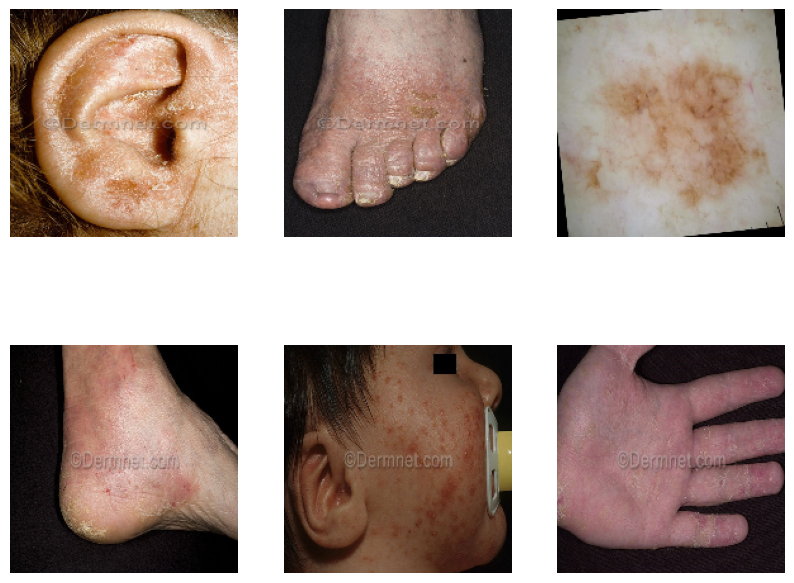

In [10]:

# Create a list of example inputs to our Gradio demo
example_list = [image for image in random.sample(images, k=6)]

# Plot the images in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

for ax, img_array in zip(axes.ravel(), example_list):
    ax.imshow(img_array)
    ax.axis('off')

plt.show()


In [11]:
label=train['target']

In [12]:
len(label)

7330

In [13]:
len(images)

7330

In [14]:
import numpy as np
import pandas as pd

In [15]:
data=np.array(images)


In [16]:
label=np.array(label)

In [17]:
data.shape

(7330, 180, 180, 3)

In [18]:
label.shape

(7330,)

In [19]:
!pip install sklearn_relief

In [20]:
vgg_model = VGG19(weights = 'imagenet',  include_top = False, input_shape = (180, 180, 3)) 

80134624/80134624 [==============================] - 0s 0us/step


In [21]:
# let's make all layers non-trainable
for layer in vgg_model.layers : 
    layer.trainable = False

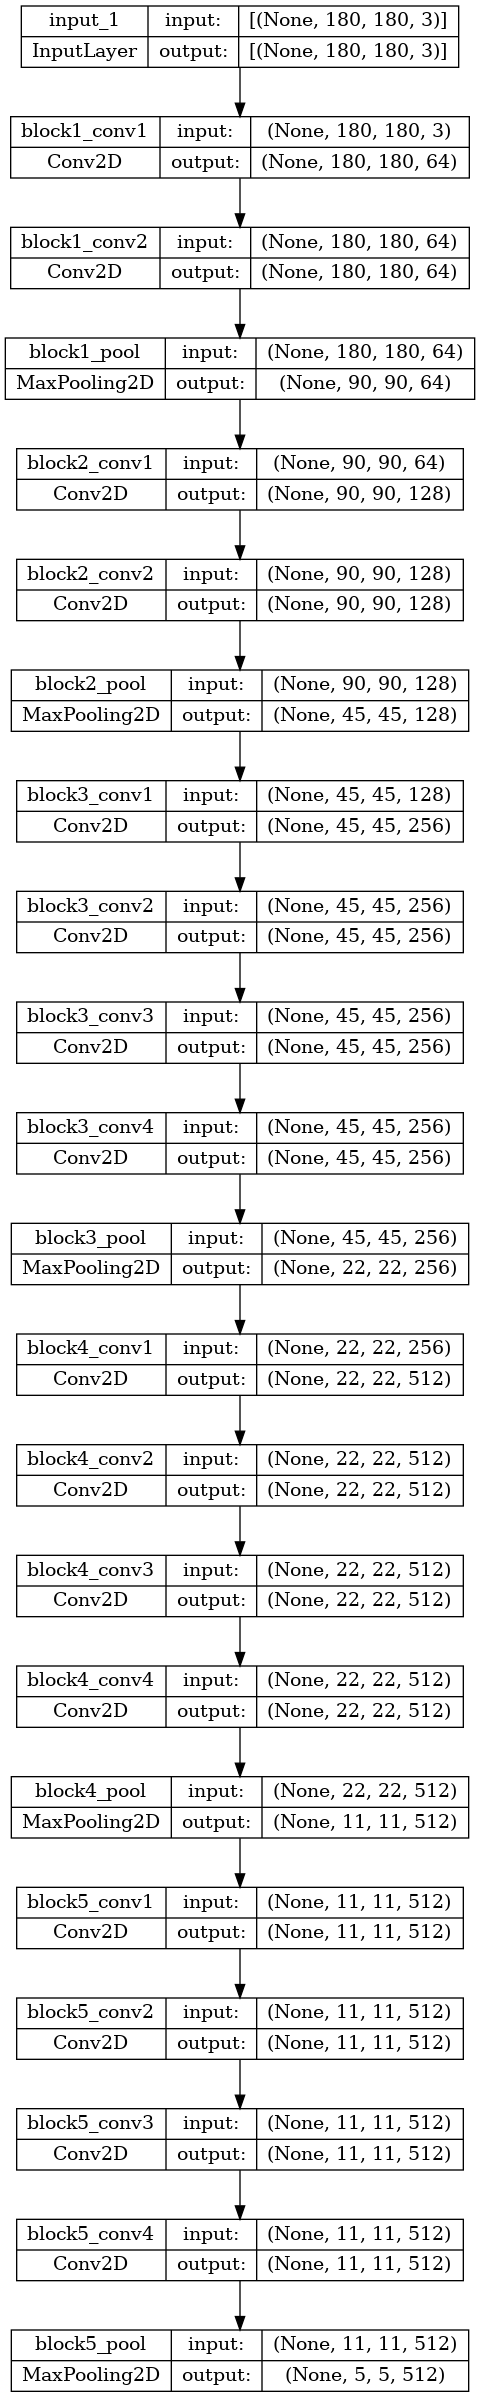

In [22]:
from keras.utils.vis_utils import plot_model
plot_model(vgg_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense


In [24]:
model=Sequential([ 
                   
                    Dense(200,activation='relu'),
                  Dense(170,activation='relu'),
                  Dense(6,activation='softmax'),

])

In [25]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [26]:
mcp_save = ModelCheckpoint('EnetB0_CIFAR10_TL.h5', save_best_only=True, monitor='val_acc')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, verbose=1,)

In [27]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split 
kf = KFold(n_splits = 3)

In [29]:
import keras
acc=[]
num_classes = 6
label = keras.utils.to_categorical(label, num_classes)

In [30]:
label.shape


(7330, 6)

In [31]:

for i in range(3): 
    x_train,x_test, y_train, y_test=train_test_split(data, label, test_size=0.2,random_state = np.random.randint(1,1000, 1)[0])
    print(x_train.shape)
    # let's make all layers non-trainable
    for layer in vgg_model.layers :
        layer.trainable = False
    features_train=vgg_model.predict(x_train)
    features_test=vgg_model.predict(x_test)
    print(features_train.shape)
    num_train=x_train.shape[0]
    num_test=x_test.shape[0]
    print(num_train)
    print(num_test)
    x_test=features_test.reshape(num_test,-1)
    x_train=features_train.reshape(num_train,-1)
    print(x_train.shape)
    print(x_train.shape)
    #x_train,x_valid,y_train,y_valid= train_test_split(x_train, y_train, test_size=0.1,random_state = np.random.randint(1,1000, 1)[0]) 
#     history=model.fit(x_train,y_train,epochs=15,batch_size=32,verbose=1) 
#     model.evaluate(x_test,y_test)

(5864, 180, 180, 3)
46/46 [==============================] - 9s 203ms/step
(5864, 5, 5, 512)
5864
1466
(5864, 12800)
(5864, 12800)
(5864, 180, 180, 3)
46/46 [==============================] - 6s 133ms/step
(5864, 5, 5, 512)
5864
1466
(5864, 12800)
(5864, 12800)
(5864, 180, 180, 3)
46/46 [==============================] - 6s 123ms/step
(5864, 5, 5, 512)
5864
1466
(5864, 12800)
(5864, 12800)


In [32]:
history = model.fit(x_train, y_train, epochs=25)


Epoch 1/25
184/184 [==============================] - 3s 4ms/step - loss: 1.7775 - accuracy: 0.6930
Epoch 2/25
184/184 [==============================] - 1s 4ms/step - loss: 0.5712 - accuracy: 0.8211
Epoch 3/25
184/184 [==============================] - 1s 4ms/step - loss: 0.3551 - accuracy: 0.8849
Epoch 4/25
184/184 [==============================] - 1s 4ms/step - loss: 0.2414 - accuracy: 0.9268
Epoch 5/25
184/184 [==============================] - 1s 4ms/step - loss: 0.1166 - accuracy: 0.9608
Epoch 6/25
184/184 [==============================] - 1s 4ms/step - loss: 0.1773 - accuracy: 0.9519
Epoch 7/25
184/184 [==============================] - 1s 5ms/step - loss: 0.1609 - accuracy: 0.9524
Epoch 8/25
184/184 [==============================] - 1s 5ms/step - loss: 0.1374 - accuracy: 0.9630
Epoch 9/25
184/184 [==============================] - 1s 4ms/step - loss: 0.1199 - accuracy: 0.9702
Epoch 10/25
184/184 [==============================] - 1s 4ms/step - loss: 0.2074 - accuracy: 0.9577

In [33]:
model.save('6claass.h5')

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

In [35]:
y_pred=model.predict(x_test)

46/46 [==============================] - 0s 2ms/step


In [36]:
y_pred2=np.argmax(y_pred, axis=1)
y_pred2

array([1, 5, 5, ..., 5, 3, 0])

In [37]:
y_test=np.argmax(y_test, axis=1)

In [38]:
y_test

array([1, 3, 0, ..., 5, 3, 0])

In [39]:
confusion_matrix_result=confusion_matrix(y_test,y_pred2)

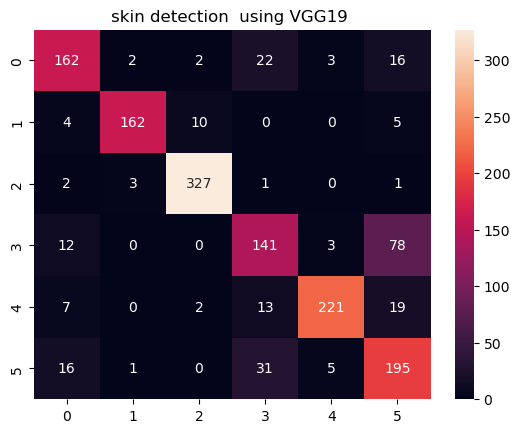

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt     
import pylab as pl
plt.title("skin detection  using VGG19 ")

ax= plt.subplot()
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', ax=ax);
pl.show()

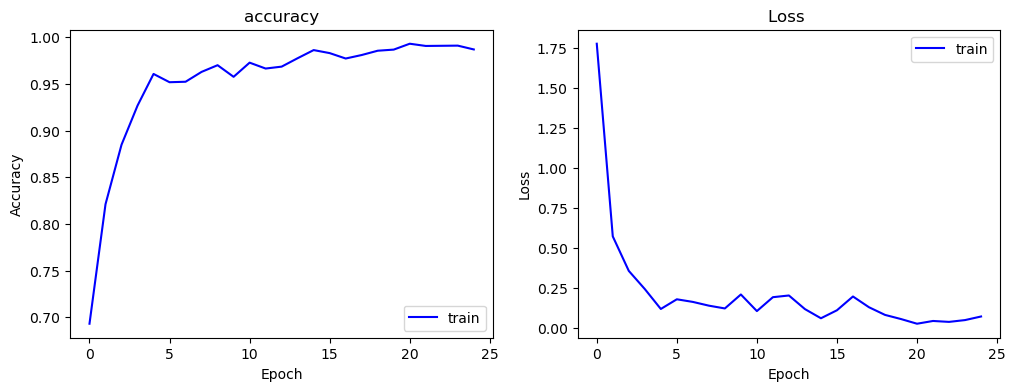

In [41]:
train_accuracy = history.history['accuracy']
#val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(train_accuracy))
plt.figure(figsize=(12,4))
# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')

plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label='Training loss')

plt.title('Loss ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

In [42]:
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D,MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import pandas as pd
import tensorflow as tf
import keras
import pickle

In [43]:
confusion_matrix=classification_report(y_test,y_pred2)

In [44]:
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       207
           1       0.96      0.90      0.93       181
           2       0.96      0.98      0.97       334
           3       0.68      0.60      0.64       234
           4       0.95      0.84      0.89       262
           5       0.62      0.79      0.69       248

    accuracy                           0.82      1466
   macro avg       0.83      0.81      0.82      1466
weighted avg       0.83      0.82      0.83      1466



In [45]:
import tensorflow as tf
import numpy as np
import cv2

import tensorflow as tf
import numpy as np
import cv2

def predict_skin_disease(image_path):
    # Load saved model
    model = tf.keras.models.load_model('6claass.h5')

    # Load and preprocess image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    img=vgg_model.predict(img)
    img=img.reshape(1,-1)
    
    # Make prediction on preprocessed image
    pred = model.predict(img)[0]
    predicted_class = np.argmax(pred)

    return predicted_class


print(predict_skin_disease("/kaggle/input/skindatasets/skin/test/Normal/0_0_aidai_0029.jpg"))

1/1 [==============================] - 0s 58ms/step
1


In [46]:
print(y_train)

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [47]:
import tensorflow as tf
import numpy as np
import cv2

def predict_skin_disease(image_path):
    # Define list of class names
    class_names = ["Acne","Eczema","Atopic","Psoriasis","Tinea","vitiligo"]

    # Load saved model
    model = tf.keras.models.load_model('6claass.h5')

    # Load and preprocess image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    img = vgg_model.predict(img)
    img = img.reshape(1, -1)

    # Make prediction on preprocessed image
    pred = model.predict(img)[0]
    predicted_class_index = np.argmax(pred)
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

print(predict_skin_disease("/kaggle/input/dermnet/test/Atopic Dermatitis Photos/03ichthyosis050127.jpg"))


1/1 [==============================] - 0s 53ms/step
Psoriasis
